<a href="https://colab.research.google.com/github/hiu04/Attrition_Project/blob/main/Attrition_View.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [92]:
import numpy as np
import pandas as pd

In [142]:
data = pd.read_csv("/content/Attrition View.csv")
data.head(3)

,CUSTOMER_ID,GENDER_ID,FIRST_NAME,LAST_NAME,PHONE_1,EMAIL,AGE,ENERGY_USAGE_PER_MONTH,ENERGY_EFFICIENCY,IS_REGISTERED_FOR_ALERTS,...,SEGMENT,EMPLOYMENT,STD_YRLY_USAGE_CUR_YEAR_MINUS_1,STD_YRLY_USAGE_CUR_YEAR_MINUS_2,STD_YRLY_USAGE_CUR_YEAR_MINUS_3,STD_YRLY_USAGE_CUR_YEAR_MINUS_4,STD_YRLY_USAGE_CUR_YEAR_MINUS_5,STD_YRLY_USAGE_CUR_YEAR_MINUS_6,STD_YRLY_USAGE_CUR_YEAR_MINUS_7,MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1
0,1,2,Leonor,Cummerata,781-757-3537,Leonor.Cummerata@nola.biz,44,5080,0.390,1,...,PLATINUM,Employed full-time,56049,43703,26666,26666,28642,26666,22963,20500
1,2,1,Ima,Labadie,505-339-5197,Ima.Labadie@allie.tv,34,4970,0.356,0,...,GOLD,Employed full-time,52098,40740,26666,26666,26666,26666,21481,20500
2,3,1,Brycen,Hermiston,309-713-5431,Brycen.Hermiston@kristina.biz,39,9250,0.628,1,...,GOLD,Employed full-time,52098,40740,24691,24691,26666,24691,21481,20500


In [94]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65000 entries, 0 to 64999
Data columns (total 41 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   CUSTOMER_ID                         65000 non-null  int64  
 1   GENDER_ID                           65000 non-null  int64  
 2   FIRST_NAME                          65000 non-null  object 
 3   LAST_NAME                           65000 non-null  object 
 4   PHONE_1                             65000 non-null  object 
 5   EMAIL                               65000 non-null  object 
 6   AGE                                 65000 non-null  int64  
 7   ENERGY_USAGE_PER_MONTH              65000 non-null  int64  
 8   ENERGY_EFFICIENCY                   65000 non-null  float64
 9   IS_REGISTERED_FOR_ALERTS            65000 non-null  int64  
 10  OWNS_HOME                           65000 non-null  int64  
 11  COMPLAINTS                          65000

There are 65000 observations and 30 variables in this dataset. Notice that CURRENT_CONTRACT and SEGMENT have missing values.

## Data Pre-processing

### Create variable lists and update

- Unnecessary variables

In [95]:
# Unnecessary columns
non_feature_cols = ['CUSTOMER_ID', 'FIRST_NAME', 'LAST_NAME', 'PHONE_1', 'EMAIL']

# Drop unnecessary columns and update dataset
data = data.drop(columns=non_feature_cols)

- Dummy variables

In [96]:
# Function to check if a column is a dummy variable
def is_dummy(column):
    unique_values = column.unique()
    return set(unique_values) == {0, 1}

# Identifying dummy variables in the dataset
dummy_variables = [column for column in data.columns if is_dummy(data[column])]

# Displaying the dummy variables
dummy_variables[:], len(dummy_variables)

(['IS_REGISTERED_FOR_ALERTS',
  'OWNS_HOME',
  'COMPLAINTS',
  'ATTRITION_STATUS',
  'HAS_THERMOSTAT',
  'HAS_HOME_AUTOMATION',
  'PV_ZONING',
  'WIND_ZONING',
  'IS_CAR_OWNER',
  'HAS_EV',
  'HAS_PV',
  'HAS_WIND',
  'EBILL',
  'IN_WARRANTY'],
 14)

In [97]:
pd.unique(data['GENDER_ID']) # Can added to dummy variables

array([2, 1])

In [98]:
# Create dummy variables list
dummy_vars = ['GENDER_ID', 'IS_REGISTERED_FOR_ALERTS', 'OWNS_HOME', 'COMPLAINTS',
              'ATTRITION_STATUS','HAS_THERMOSTAT', 'HAS_HOME_AUTOMATION',
              'PV_ZONING','WIND_ZONING', 'IS_CAR_OWNER','HAS_EV', 'HAS_PV',
              'HAS_WIND','EBILL','IN_WARRANTY']

- Target vairable and numerical variable lists

In [99]:
# Define target (dependent) variable
target_col = 'ATTRITION_STATUS'

numerical_vars = ['AGE', 'ENERGY_EFFICIENCY',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_2',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_4',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_6',
                  'STD_YRLY_USAGE_CUR_YEAR_MINUS_7',
                  'MEDIAN_YRLY_USAGE_CUR_YEAR_MINUS_1',
                  'ENERGY_USAGE_PER_MONTH', 'TENURE']

- Categorical Variables

In [100]:
# Identifying categorical variables by excluding dummy, target and
# numerical variables
categorical_vars = [column for column in data.columns
                    if column not in (dummy_vars + numerical_vars + [target_col])]

In [112]:
categorical_vars, len(categorical_vars)

(['SMART_METER_COMMENTS',
  'CITY',
  'CURRENT_OFFER',
  'CURRENT_CONTRACT',
  'CURRENT_ISSUE',
  'MARITAL_STATUS',
  'EDUCATION',
  'SEGMENT',
  'EMPLOYMENT'],
 9)

### EDA

#### Numerical variables

- Heatmap (numerical variables)

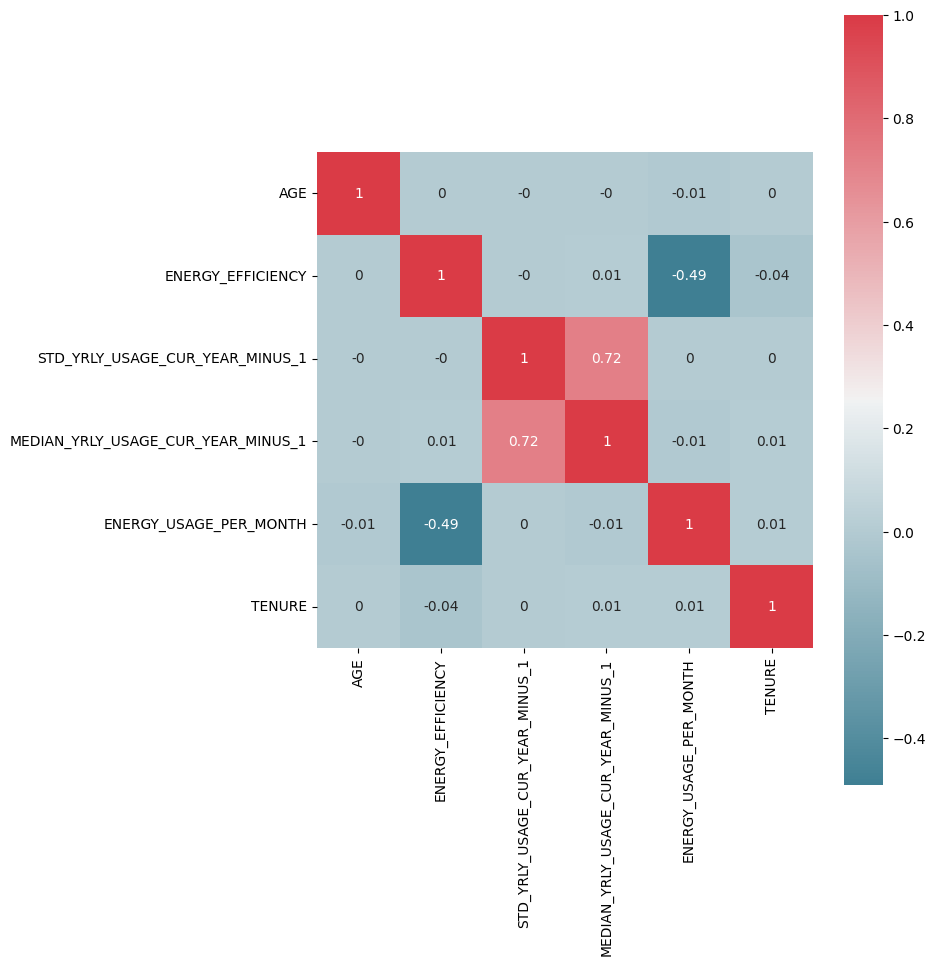

In [136]:
import matplotlib.pyplot as plt
import seaborn as sns

# check correlation between numerical features
f, ax = plt.subplots(figsize=(8, 10))
corr = data[numerical_vars].corr()
corr = corr.round(2)
temp = sns.heatmap(corr, mask=np.zeros_like(corr, dtype=bool),
                   cmap=sns.diverging_palette(220, 10, as_cmap=True),
                   square=True, ax=ax,annot=True)

Those STU_YRLY_USAGE_YEAR_MINUS variables are highly correlated, we can only keep **STU_YRLY_USAGE_YEAR_MINUS_1** in the dataset.

In [103]:
# Correlated columns
cols = ['STD_YRLY_USAGE_CUR_YEAR_MINUS_2', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_3',
        'STD_YRLY_USAGE_CUR_YEAR_MINUS_4', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_5',
        'STD_YRLY_USAGE_CUR_YEAR_MINUS_6', 'STD_YRLY_USAGE_CUR_YEAR_MINUS_7']

# Drop unnecessary columns and update dataset
data = data.drop(columns=cols)

In [104]:
# Drop and update numerical_vars list
numerical_vars = [i for i in numerical_vars if i not in cols]

In [137]:
# Length of currentnumerical variables list
len(numerical_vars)

6

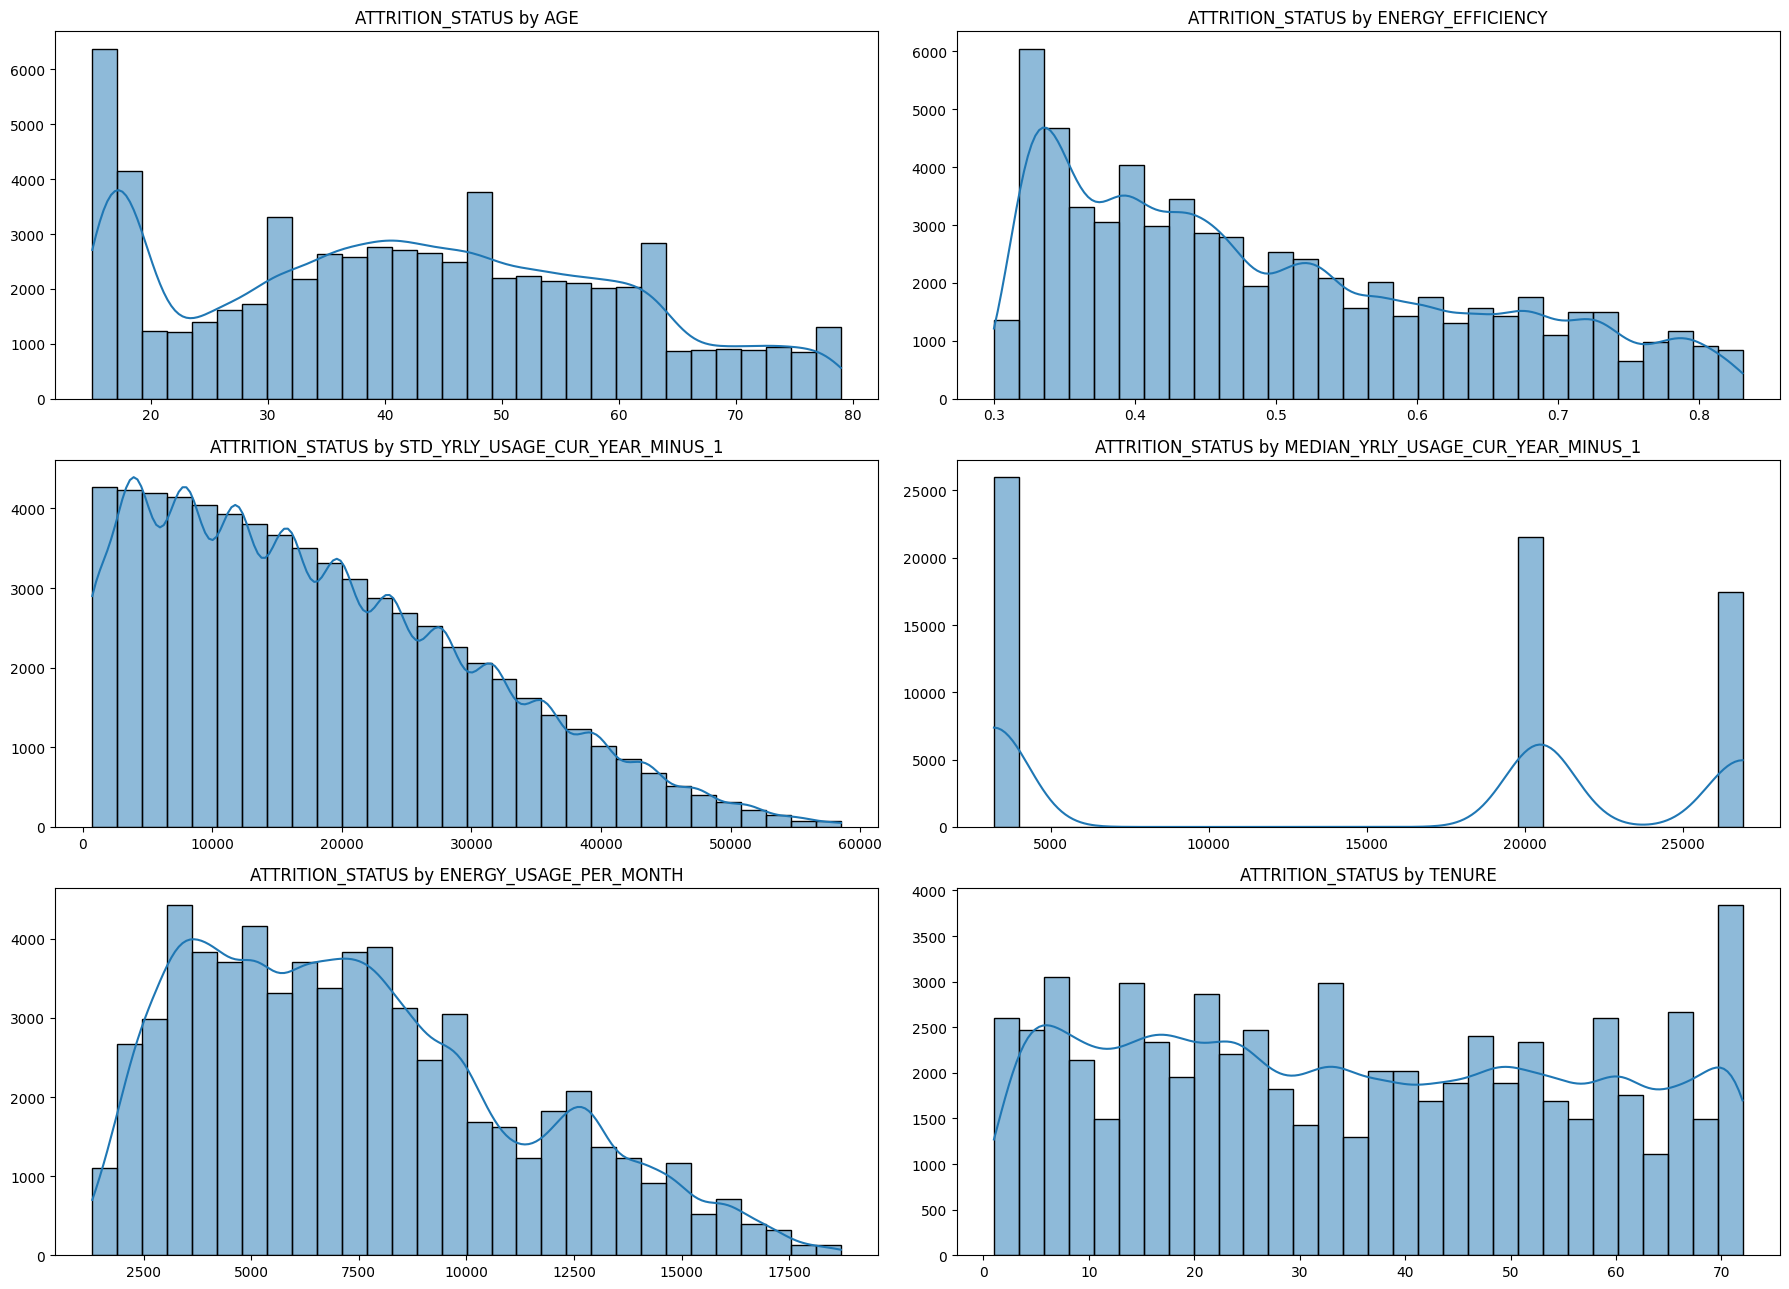

In [141]:
fig, axes = plt.subplots(3, 2, figsize=(18,13))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()
for i, column in enumerate(numerical_vars):
  sns.histplot(data[column], kde=True, bins=30, ax=axes[i])
  axes[i].set_title(f'ATTRITION_STATUS by {column}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')

plt.tight_layout()
plt.show()

#### Categorical Variables

- Missing Values


Only two categorical variables have missing values.

In [106]:
# Replacing missing values with the median of each column for numerical variables
# data = data.fillna(data.median(numeric_only=True))

# Replacing missing values in categorical columns with the mode of each column
for column in data.select_dtypes(include=['object']).columns:
    data[column].fillna(data[column].mode()[0], inplace=True)

In [107]:
# Checking if there are still any missing values in the dataset
data.isnull().sum().sum()

0

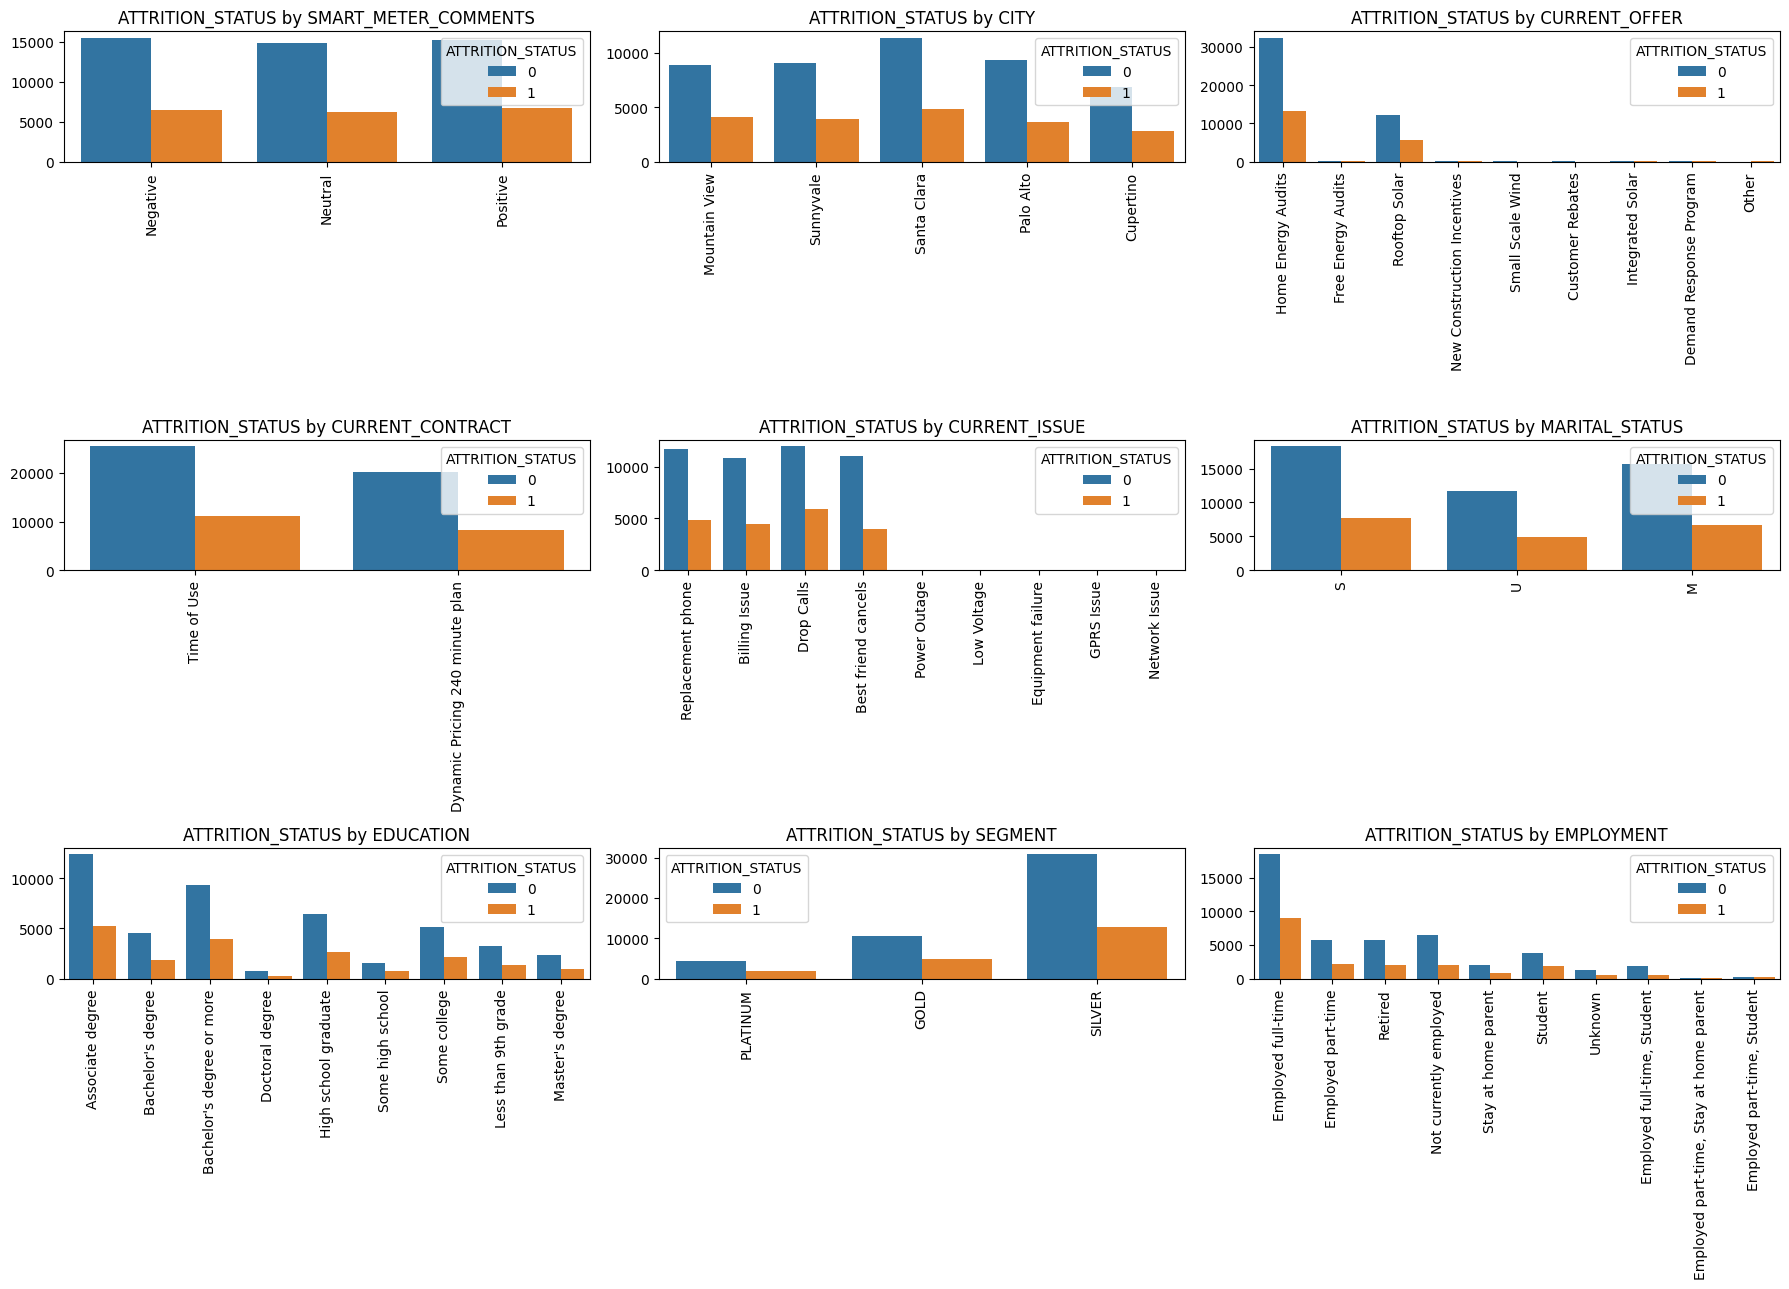

In [132]:
fig, axes = plt.subplots(3, 3, figsize=(18,13))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()
for i, column in enumerate(categorical_vars):
  sns.countplot(x=column, hue='ATTRITION_STATUS', data=data, ax=axes[i])
  axes[i].set_title(f'ATTRITION_STATUS by {column}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].legend(title='ATTRITION_STATUS')
  axes[i].tick_params(axis='x', rotation=90)

plt.tight_layout()
plt.show()


#### Dummy Variables

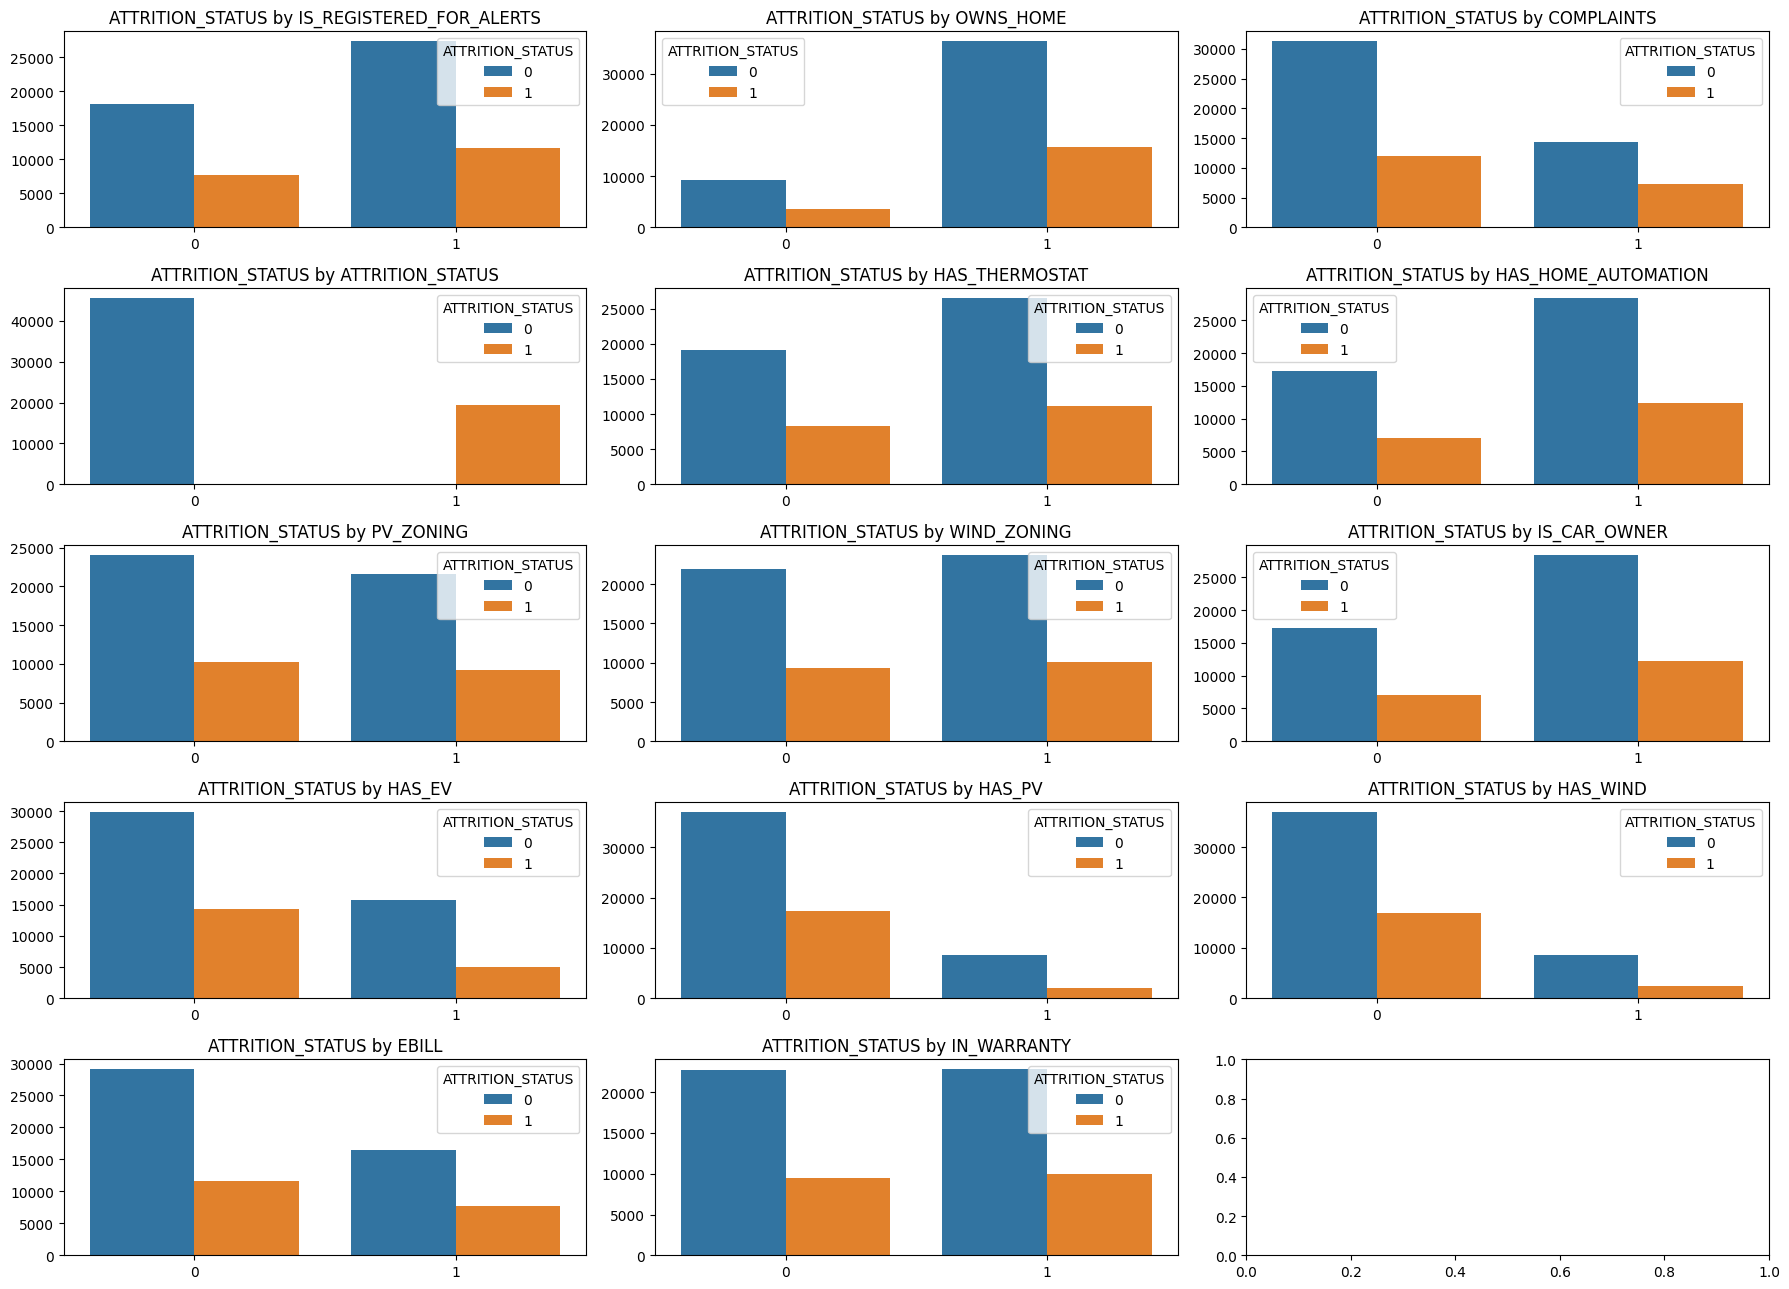

In [135]:
fig, axes = plt.subplots(5, 3, figsize=(18,13))
fig.subplots_adjust(hspace=0.5, wspace=0.5)
axes = axes.ravel()
for i, column in enumerate(dummy_variables):
  sns.countplot(x=column, hue='ATTRITION_STATUS', data=data, ax=axes[i])
  axes[i].set_title(f'ATTRITION_STATUS by {column}')
  axes[i].set_xlabel('')
  axes[i].set_ylabel('')
  axes[i].legend(title='ATTRITION_STATUS')

plt.tight_layout()
plt.show()